# 고전 방식

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape[0]

10000

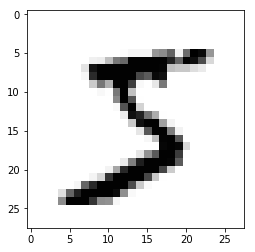

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [10]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [11]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [12]:
X_train = X_train.astype('float64')
X_train = X_train/255

In [13]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

In [14]:
Y_class_train[0]

5

In [15]:
from keras.utils import np_utils

In [16]:
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [17]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [35]:
import numpy as np
import tensorflow as tf
import os

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [36]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [43]:
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [58]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath='./model/[epoch:02d]-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

In [59]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 200, verbose = 0, callbacks = [early_stopping_callback, checkpointer] )


Epoch 00001: val_loss improved from inf to 0.07899, saving model to ./model/[epoch:02d]-0.0790.hdf5

Epoch 00002: val_loss did not improve from 0.07899

Epoch 00003: val_loss did not improve from 0.07899

Epoch 00004: val_loss improved from 0.07899 to 0.07817, saving model to ./model/[epoch:02d]-0.0782.hdf5

Epoch 00005: val_loss improved from 0.07817 to 0.07515, saving model to ./model/[epoch:02d]-0.0752.hdf5

Epoch 00006: val_loss did not improve from 0.07515

Epoch 00007: val_loss did not improve from 0.07515

Epoch 00008: val_loss did not improve from 0.07515

Epoch 00009: val_loss did not improve from 0.07515

Epoch 00010: val_loss did not improve from 0.07515

Epoch 00011: val_loss did not improve from 0.07515

Epoch 00012: val_loss did not improve from 0.07515

Epoch 00013: val_loss did not improve from 0.07515

Epoch 00014: val_loss did not improve from 0.07515

Epoch 00015: val_loss did not improve from 0.07515

Epoch 00016: val_loss did not improve from 0.07515

Epoch 00017:

In [60]:
print("\n Test_Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 0s 37us/step

 Test_Accuracy: 0.9833


In [61]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

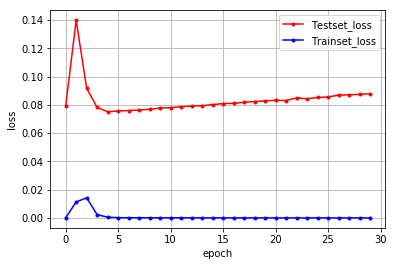

In [63]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c = 'red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c = 'blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# CNN 방식

In [65]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [66]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [69]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [71]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

W0819 11:28:31.397217  2188 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0819 11:28:31.406217  2188 deprecation.py:506] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [74]:
MODEL_DIR = './model_cnn/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath='./model_cnn/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [75]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size=200, verbose = 0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.04002, saving model to ./model_cnn/01-0.0400.hdf5

Epoch 00002: val_loss improved from 0.04002 to 0.03277, saving model to ./model_cnn/02-0.0328.hdf5

Epoch 00003: val_loss did not improve from 0.03277

Epoch 00004: val_loss improved from 0.03277 to 0.03129, saving model to ./model_cnn/04-0.0313.hdf5

Epoch 00005: val_loss did not improve from 0.03129

Epoch 00006: val_loss improved from 0.03129 to 0.02913, saving model to ./model_cnn/06-0.0291.hdf5

Epoch 00007: val_loss improved from 0.02913 to 0.02701, saving model to ./model_cnn/07-0.0270.hdf5

Epoch 00008: val_loss did not improve from 0.02701

Epoch 00009: val_loss improved from 0.02701 to 0.02687, saving model to ./model_cnn/09-0.0269.hdf5

Epoch 00010: val_loss did not improve from 0.02687

Epoch 00011: val_loss did not improve from 0.02687

Epoch 00012: val_loss did not improve from 0.02687

Epoch 00013: val_loss did not improve from 0.02687

Epoch 00014: val_loss improved from 0.0

In [77]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 3s 338us/step

 Test Accuracy: 0.9919


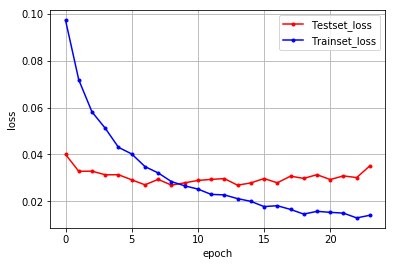

In [78]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c = 'blue', label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()